# S-Curve Scan with Qinj

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os
from fnmatch import fnmatch
import hist
from hist import Hist
import scipy.stats as stats

In [2]:
QInjEns = [5, 6, 8, 10, 12, 15, 17, 20, 22, 25, 27, 30]
DAC_min = 10
DAC_max = 180
DAC_dis = 2
thresholds = {}

for qinj in QInjEns:
  thresholds[qinj] = np.arange(DAC_min,DAC_max,DAC_dis)

row_list = [14]
col_list = [6]
scan_list = list(zip(col_list, row_list))
print(scan_list)

[(6, 14)]


In [3]:
def return_empty_list():
    return {(row,col):{q:{DAC:0 for DAC in thresholds[q]}for q in QInjEns} for row,col in scan_list}

In [4]:
h = {(row,col):{q:{DAC:(
        Hist.new.Integer(125, 165, name="CAL", label="CAL [LSB]")
        .Integer(45, 85, name="TOT", label="TOT [LSB]")
        .Integer(150, 275, name="TOA", label="TOA [LSB]")
        .Double()
      )
      for DAC in thresholds[q]}
     for q in QInjEns}
    for row,col in scan_list}
hit_counts = return_empty_list()
print(f'{hit_counts}')
CAL_sum = return_empty_list()
CAL_sum_sq = return_empty_list()
TOA_sum = return_empty_list()
TOA_sum_sq = return_empty_list()
TOT_sum = return_empty_list()
TOT_sum_sq = return_empty_list()
toa_30fc = []
tot_30fc = []
cal_30fc = []

{(6, 14): {5: {10: 0, 12: 0, 14: 0, 16: 0, 18: 0, 20: 0, 22: 0, 24: 0, 26: 0, 28: 0, 30: 0, 32: 0, 34: 0, 36: 0, 38: 0, 40: 0, 42: 0, 44: 0, 46: 0, 48: 0, 50: 0, 52: 0, 54: 0, 56: 0, 58: 0, 60: 0, 62: 0, 64: 0, 66: 0, 68: 0, 70: 0, 72: 0, 74: 0, 76: 0, 78: 0, 80: 0, 82: 0, 84: 0, 86: 0, 88: 0, 90: 0, 92: 0, 94: 0, 96: 0, 98: 0, 100: 0, 102: 0, 104: 0, 106: 0, 108: 0, 110: 0, 112: 0, 114: 0, 116: 0, 118: 0, 120: 0, 122: 0, 124: 0, 126: 0, 128: 0, 130: 0, 132: 0, 134: 0, 136: 0, 138: 0, 140: 0, 142: 0, 144: 0, 146: 0, 148: 0, 150: 0, 152: 0, 154: 0, 156: 0, 158: 0, 160: 0, 162: 0, 164: 0, 166: 0, 168: 0, 170: 0, 172: 0, 174: 0, 176: 0, 178: 0}, 6: {10: 0, 12: 0, 14: 0, 16: 0, 18: 0, 20: 0, 22: 0, 24: 0, 26: 0, 28: 0, 30: 0, 32: 0, 34: 0, 36: 0, 38: 0, 40: 0, 42: 0, 44: 0, 46: 0, 48: 0, 50: 0, 52: 0, 54: 0, 56: 0, 58: 0, 60: 0, 62: 0, 64: 0, 66: 0, 68: 0, 70: 0, 72: 0, 74: 0, 76: 0, 78: 0, 80: 0, 82: 0, 84: 0, 86: 0, 88: 0, 90: 0, 92: 0, 94: 0, 96: 0, 98: 0, 100: 0, 102: 0, 104: 0, 106: 0

In [5]:
text_state = 0
root = '../../ETROC-Data/'
file_pattern = "FPGA*.dat"
hit_counts = return_empty_list()
for index, row, col in zip((range(len(row_list))), row_list, col_list):
    for QInj in (QInjEns):
        for idx_DAC,DAC in enumerate(thresholds[QInj]):
            # print(f'Pixel {col},{row} - {QInj} fC - DAC {DAC}')
            path_pattern = f"*2023-07-25_Array_Test_Results/E2_testing_VRef_SCurve_Pixel_C{col}_R{row}_QInj_{QInj}_Threshold_{DAC}_HVoff_pf_hits"
            file_list = []
            for path, subdirs, files in os.walk(root):
                if not fnmatch(path, path_pattern): continue
                for name in files:
                    pass
                    if fnmatch(name, file_pattern):
                        file_list.append(os.path.join(path, name))
                        # print(file_list[-1])
            current_bcid = -1
            previous_bcid = -1
            total_files = len(file_list)
            for file_index, file_name in enumerate(file_list):
                # print(f"{file_index+1}/{total_files}")
                with open(file_name) as infile:
                    for line in infile:
                        text_list = line.split(',')
                        h_hit = text_list[3]  
                        if text_list[0]!=text_state : hit_counts[col,row][QInj][DAC] += int(h_hit)                        
                        text_state = text_list[0]
                        # print(f'h_hit: {h_hit}' )
                        # print(f'hit_counts: {hit_counts[col,row][QInj]}' )

In [6]:
toa_30fc = np.array(toa_30fc)
tot_30fc = np.array(tot_30fc)

## S-Curve Plots

In [7]:
def turning_point(key_array, array):
    return np.argmax(np.where(key_array>2000, array, 0))

 seli = [50 50 48 46 46 46 46 44 46 44 44 44]


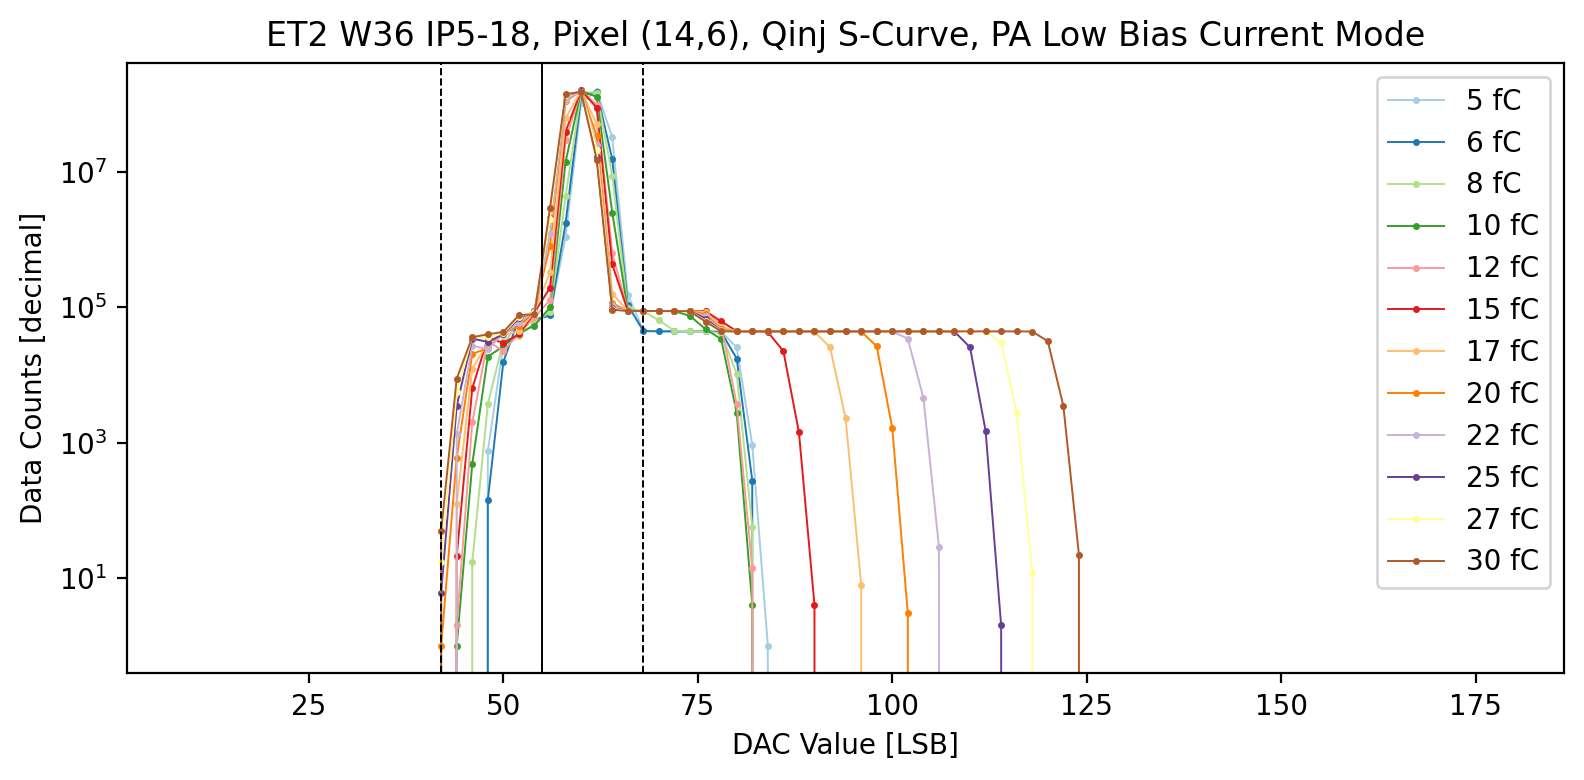

In [162]:
fig = plt.figure(dpi=200, figsize=(8,4))
gs = fig.add_gridspec(len(scan_list),len(scan_list))
u_cl = np.sort(np.unique(col_list))
u_rl = np.sort(np.unique(row_list))
seli=np.zeros(len(QInjEns),dtype=int)
selx=np.zeros(len(QInjEns),dtype=int)
selmax=np.zeros(len(QInjEns),dtype=int)

colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928']

for ri,row in enumerate(u_rl):
    for ci,col in enumerate(u_cl):
        ax0 = fig.add_subplot(gs[len(u_rl)-ri-1,len(u_cl)-ci-1])
        for i, QInj in enumerate(QInjEns):
            tp_idx = turning_point(np.array(list(hit_counts[(col,row)][QInj].values())), thresholds[QInj])
            xpltda,  = ax0.plot(thresholds[QInj], hit_counts[(col,row)][QInj].values(), '.-', color=colors[i], label=f"{QInj} fC", lw=0.7, markersize=3)
            # print(xpltda)
            dif=xpltda.get_ydata()
            dify= abs(np.diff(dif))
            # print(i)
            seli[i]= xpltda.get_xdata()[:][dif!=0][1]
            selx[i] = xpltda.get_xdata()[:-1][(dify<100)&(dify>0)][0]
            selmax[i]=xpltda.get_xdata()[:][dif.argmax()]
            
            # print(f'selmax = {selmax}')
            # print(f'selx = {selx}')
            # if selmax < selx : 
            # print(np.argmax(dif))
            # selmax= xpltda.get_
            # print(selmax)
            
        plt.title(f"ET2 W36 IP5-18, Pixel ({row},{col}), Qinj S-Curve, PA Low Bias Current Mode")
        plt.legend(loc="upper right")
        print(f' seli = {seli}')
        selini=np.min(seli)
        selfin=np.max(selx)
        ax0.axvline(selfin-2, color='k', lw=0.7,ls='dashed')
        ax0.axvline(selini-2, color='k', lw=0.7,ls='dashed')
        ax0.axvline(((selfin-2)+(selini-2))/2, color='k', lw=0.7)
        ax0.set_xlabel("DAC Value [LSB]")
        ax0.set_ylabel("Data Counts [decimal]")
    
plt.tight_layout()
plt.yscale('log')
plt.savefig(f"figures/simple_scurve_({row},{col}).png")
plt.show()

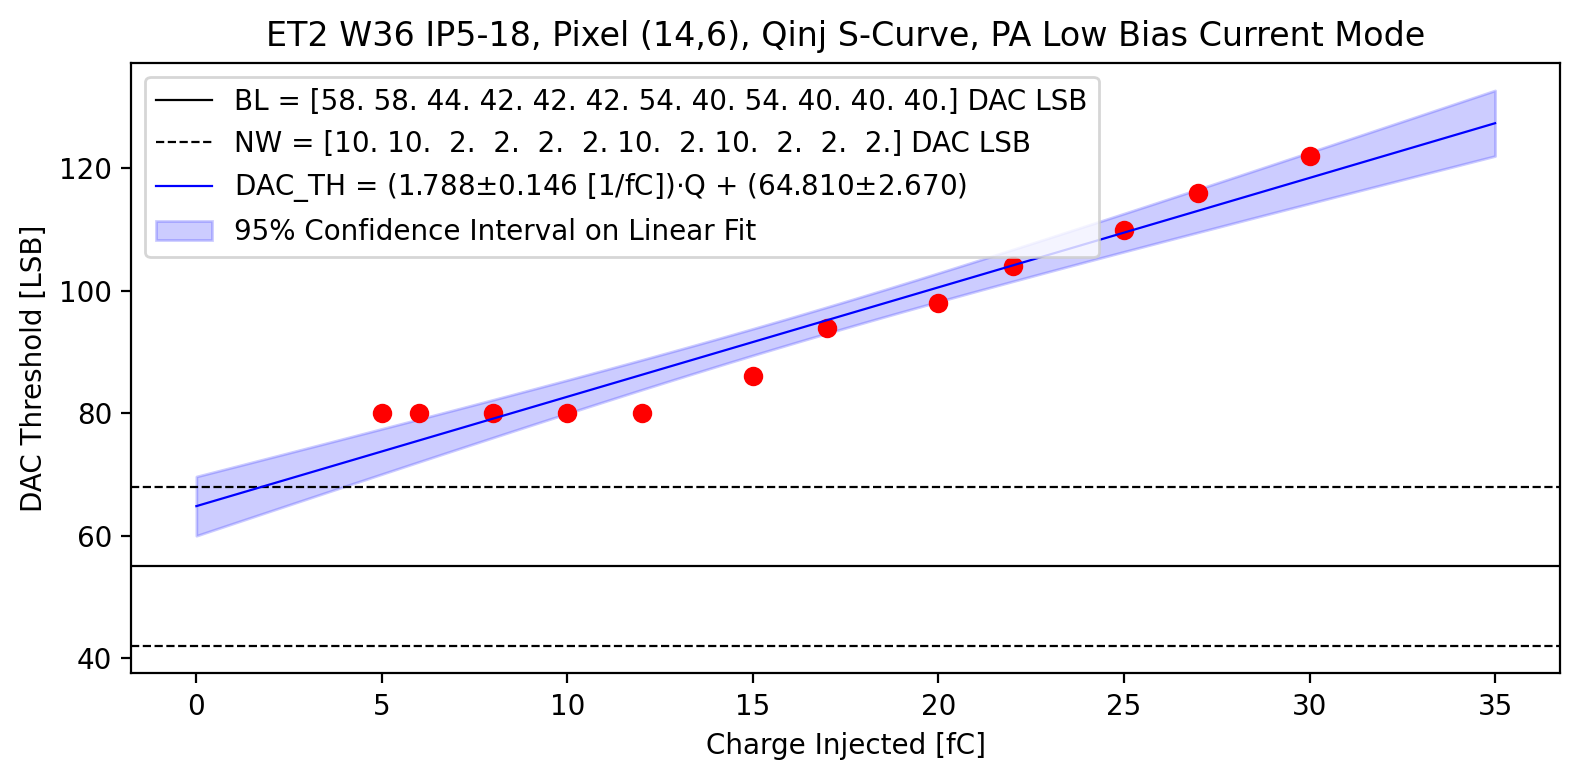

In [163]:
# https://nbviewer.org/github/demotu/BMC/blob/master/notebooks/CurveFitting.ipynb
# https://tomholderness.wordpress.com/2013/01/10/confidence_intervals/
# https://stackoverflow.com/questions/27164114/show-confidence-limits-and-prediction-limits-in-scatter-plot

fig = plt.figure(dpi=200, figsize=(8,4))
gs = fig.add_gridspec(len(scan_list),len(scan_list))
u_cl = np.sort(np.unique(col_list))
u_rl = np.sort(np.unique(row_list))
for ri,row in enumerate(u_rl):
    for ci,col in enumerate(u_cl):
        ax0 = fig.add_subplot(gs[len(u_rl)-ri-1,len(u_cl)-ci-1])
        ax0.axhline(((selini-2)+(selfin-2))/2, color='k', lw=0.8, label=f"BL = {((seli-2)+(selx-2))/2} DAC LSB")
        ax0.axhline(selini-2, color='k',ls="--", lw=0.8, label=f"NW = {abs(((seli-2)-(selx-2))/2)} DAC LSB")
        ax0.axhline(selfin-2, color='k',ls="--", lw=0.8)
        X = []
        Y = []
        for QInj in QInjEns:
            tp_idx = turning_point(np.array(list(hit_counts[(col,row)][QInj].values())), thresholds[QInj])
            ax0.plot(QInj, thresholds[QInj][tp_idx], 'ro')
            X.append(QInj)
            Y.append(thresholds[QInj][tp_idx])
        X = np.array(X)
        Y = np.array(Y)
        (m, b), cov = np.polyfit(X, Y, 1, cov = True)
        n = Y.size
        Yfit = np.polyval((m,b), X)
        errorbars = np.sqrt(np.diag(cov))
        x_range = np.linspace(0, 35, 100)
        y_est = b + m*x_range
        resid = Y - Yfit
        s_err = np.sqrt(np.sum(resid**2)/(n - 2))
        t = stats.t.ppf(0.95, n - 2)
        ci = t * s_err * np.sqrt(    1/n + (X - np.mean(X))**2/np.sum((X-np.mean(X))**2)) # confidence interval
        pi = t * s_err * np.sqrt(1 + 1/n + (X - np.mean(X))**2/np.sum((X-np.mean(X))**2)) # prediction interval
        # cip= t * s_err * np.sqrt(    1/n + (X - np.mean(X))**2/(np.sum((X)**2)-n*np.sum((np.mean(X))**2)))
        ci2= t * s_err * np.sqrt(    1/n + (x_range - np.mean(X))**2/(np.sum((X)**2)-n*np.sum((np.mean(X))**2)))
        
        ax0.plot(x_range, y_est, 'b-', lw=-.8, label=f"DAC_TH = ({m:.3f}$\pm${errorbars[0]:.3f} [1/fC])$\cdot$Q + ({b:.3f}$\pm${errorbars[1]:.3f})")
        plt.fill_between(x_range, y_est+ci2, y_est-ci2, color='b',alpha=0.2, label="95% Confidence Interval on Linear Fit")
        ax0.set_xlabel("Charge Injected [fC]")
        ax0.set_ylabel("DAC Threshold [LSB]")
        plt.title(f"ET2 W36 IP5-18, Pixel ({row},{col}), Qinj S-Curve, PA Low Bias Current Mode")
        plt.legend(loc="upper left")
plt.tight_layout()
# plt.savefig("figures/q_vs_dac_scurve.pdf")
plt.savefig(f"figures/q_vs_dac_scurve_({row},{col}).png")
plt.show()

## TOA TOT CAL plots vs DAC

In [ ]:
fig = plt.figure(dpi=200, figsize=(8,4))
gs = fig.add_gridspec(len(scan_list),len(scan_list))
u_cl = np.sort(np.unique(col_list))
u_rl = np.sort(np.unique(row_list))
for ri,row in enumerate(u_rl):
    for ci,col in enumerate(u_cl):
        ax0 = fig.add_subplot(gs[len(u_rl)-ri-1,len(u_cl)-ci-1])

        for QInj in QInjEns:
            tp_idx = turning_point(np.array(list(hit_counts[(row,col)][QInj].values())), thresholds[QInj])
            if(QInj==5):
                ax0.plot(thresholds[QInj][15:tp_idx-2], np.array(list(TOA_mean[(row,col)][QInj].values()))[15:tp_idx-2], '.-', label=f"{QInj} fC")
            else:
                ax0.plot(thresholds[QInj][15:tp_idx-0], np.array(list(TOA_mean[(row,col)][QInj].values()))[15:tp_idx-0], '.-', label=f"{QInj} fC")

            p = np.polyfit(thresholds[QInj][15:tp_idx-2], np.array(list(TOA_mean[(row,col)][QInj].values()))[15:tp_idx-2], 3)
            x_range = np.linspace(248, thresholds[QInj][15:tp_idx-2], 100)
            Yest = np.polyval(p, x_range)
            ax0.plot(x_range, Yest, 'k-', lw=0.7)

        ax0.axvline(BL_map_THCal[(row,col)][15][232], color='k', lw=0.7, label=f"THCal BL = {int(BL_map_THCal[(row,col)][15][232])}")
        ax0.set_xlabel("DAC Value [LSB]")
        ax0.set_ylabel("TOA Mean [LSB]")
        plt.title(f"Bare Chip 01E2 #52, Pixel ({row},{col}), Qinj S-Curve, PA Low Bias Current Mode")
        plt.legend(loc="upper right")

        
plt.tight_layout()
# plt.savefig("figures/toa_mean_scurve.pdf")
plt.show()

In [ ]:
fig = plt.figure(dpi=200, figsize=(8,4))
gs = fig.add_gridspec(len(scan_list),len(scan_list))
u_cl = np.sort(np.unique(col_list))
u_rl = np.sort(np.unique(row_list))
for ri,row in enumerate(u_rl):
    for ci,col in enumerate(u_cl):
        ax0 = fig.add_subplot(gs[len(u_rl)-ri-1,len(u_cl)-ci-1])
        for QInj in QInjEns:
            tp_idx = turning_point(np.array(list(hit_counts[(row,col)][QInj].values())), thresholds[QInj])
            if(QInj==5):
                ax0.plot(thresholds[QInj][15:tp_idx-2], np.array(list(TOA_mean[(row,col)][QInj].values()))[15:tp_idx-2], '.-', label=f"{QInj} fC")
            else:
                ax0.plot(thresholds[QInj][15:tp_idx-0], np.array(list(TOA_mean[(row,col)][QInj].values()))[15:tp_idx-0], '.-', label=f"{QInj} fC")
        ax0.set_xlabel("DAC Value [LSB]")
        ax0.set_ylabel("TOA Mean [LSB]")
        plt.title(f"Bare Chip 01E2 #52, Pixel ({row},{col}), Qinj S-Curve, PA Low Bias Current Mode")
        plt.legend(loc="upper right")
plt.tight_layout()
plt.savefig("figures/toa_mean_scurve.pdf")
plt.show()

In [ ]:
fig = plt.figure(dpi=200, figsize=(8,4))
gs = fig.add_gridspec(len(scan_list),len(scan_list))
u_cl = np.sort(np.unique(col_list))
u_rl = np.sort(np.unique(row_list))
for ri,row in enumerate(u_rl):
    for ci,col in enumerate(u_cl):
        ax0 = fig.add_subplot(gs[len(u_rl)-ri-1,len(u_cl)-ci-1])
        X = []
        Y = []
        for QInj in QInjEns:
            tp_idx = turning_point(np.array(list(hit_counts[(row,col)][QInj].values())), thresholds[QInj])
            if(QInj==5):
                ax0.plot(thresholds[QInj][15:tp_idx-2], np.array(list(TOA_std[(row,col)][QInj].values()))[15:tp_idx-2], '.-', label=f"{QInj} fC")
            else:
                ax0.plot(thresholds[QInj][15:tp_idx-0], np.array(list(TOA_std[(row,col)][QInj].values()))[15:tp_idx-0], '.-', label=f"{QInj} fC")
            X.append(QInj)
            Y.append(thresholds[QInj][tp_idx])
        X = np.array(X)
        Y = np.array(Y)
        ax0.set_xlabel("DAC Value [LSB]")
        ax0.set_ylabel("TOA Std [LSB]")
        plt.title(f"Bare Chip 01E2 #52, Pixel ({row},{col}), Qinj S-Curve, PA Low Bias Current Mode")
        plt.legend(loc="upper right")
plt.tight_layout()
plt.savefig("figures/ta_std_scurve.pdf")
plt.show()

In [ ]:
fig = plt.figure(dpi=200, figsize=(8,4))
gs = fig.add_gridspec(len(scan_list),len(scan_list))
u_cl = np.sort(np.unique(col_list))
u_rl = np.sort(np.unique(row_list))
for ri,row in enumerate(u_rl):
    for ci,col in enumerate(u_cl):
        ax0 = fig.add_subplot(gs[len(u_rl)-ri-1,len(u_cl)-ci-1])
        X = []
        Y = []
        for QInj in QInjEns:
            tp_idx = turning_point(np.array(list(hit_counts[(row,col)][QInj].values())), thresholds[QInj])
            if(QInj==5):
                ax0.plot(thresholds[QInj][15:tp_idx-2], np.array(list(CAL_mean[(row,col)][QInj].values()))[15:tp_idx-2], '.-', label=f"{QInj} fC")
            else:
                ax0.plot(thresholds[QInj][15:tp_idx-0], np.array(list(CAL_mean[(row,col)][QInj].values()))[15:tp_idx-0], '.-', label=f"{QInj} fC")
            X.append(QInj)
            Y.append(thresholds[QInj][tp_idx])
        X = np.array(X)
        Y = np.array(Y)
        ax0.set_xlabel("DAC Value [LSB]")
        ax0.set_ylabel("CAL Mean [LSB]")
        plt.title(f"Bare Chip 01E2 #52, Pixel ({row},{col}), Qinj S-Curve, PA Low Bias Current Mode")
        plt.legend(loc="upper right")
plt.tight_layout()
plt.savefig("figures/cal_mean_scurve.pdf")
plt.show()

In [ ]:
fig = plt.figure(dpi=200, figsize=(8,4))
gs = fig.add_gridspec(len(scan_list),len(scan_list))
u_cl = np.sort(np.unique(col_list))
u_rl = np.sort(np.unique(row_list))
for ri,row in enumerate(u_rl):
    for ci,col in enumerate(u_cl):
        ax0 = fig.add_subplot(gs[len(u_rl)-ri-1,len(u_cl)-ci-1])
        X = []
        Y = []
        for QInj in QInjEns:
            tp_idx = turning_point(np.array(list(hit_counts[(row,col)][QInj].values())), thresholds[QInj])
            if(QInj==5):
                ax0.plot(thresholds[QInj][15:tp_idx-2], np.array(list(CAL_std[(row,col)][QInj].values()))[15:tp_idx-2], '.-', label=f"{QInj} fC")
            else:
                ax0.plot(thresholds[QInj][15:tp_idx-0], np.array(list(CAL_std[(row,col)][QInj].values()))[15:tp_idx-0], '.-', label=f"{QInj} fC")
            X.append(QInj)
            Y.append(thresholds[QInj][tp_idx])
        X = np.array(X)
        Y = np.array(Y)
        ax0.set_xlabel("DAC Value [LSB]")
        ax0.set_ylabel("CAL Std [LSB]")
        plt.title(f"Bare Chip 01E2 #52, Pixel ({row},{col}), Qinj S-Curve, PA Low Bias Current Mode")
        plt.legend(loc="upper right")
plt.tight_layout()
plt.savefig("figures/cal_std_scurve.pdf")
plt.show()

In [ ]:
fig = plt.figure(dpi=200, figsize=(8,4))
gs = fig.add_gridspec(len(scan_list),len(scan_list))
u_cl = np.sort(np.unique(col_list))
u_rl = np.sort(np.unique(row_list))
for ri,row in enumerate(u_rl):
    for ci,col in enumerate(u_cl):
        ax0 = fig.add_subplot(gs[len(u_rl)-ri-1,len(u_cl)-ci-1])
        X = []
        Y = []
        for QInj in QInjEns:
            tp_idx = turning_point(np.array(list(hit_counts[(row,col)][QInj].values())), thresholds[QInj])
            if(QInj==5):
                ax0.plot(thresholds[QInj][15:tp_idx-2], np.array(list(TOT_mean[(row,col)][QInj].values()))[15:tp_idx-2], '.-', label=f"{QInj} fC")
            else:
                ax0.plot(thresholds[QInj][15:tp_idx-0], np.array(list(TOT_mean[(row,col)][QInj].values()))[15:tp_idx-0], '.-', label=f"{QInj} fC")
            X.append(QInj)
            Y.append(thresholds[QInj][tp_idx])
        X = np.array(X)
        Y = np.array(Y)
        ax0.set_xlabel("DAC Value [LSB]")
        ax0.set_ylabel("TOT Mean [LSB]")
        plt.title(f"Bare Chip 01E2 #52, Pixel ({row},{col}), Qinj S-Curve, PA Low Bias Current Mode")
        plt.legend(loc="upper right")
plt.tight_layout()
plt.savefig("figures/tot_mean_scurve.pdf")
plt.show()

In [ ]:
fig = plt.figure(dpi=200, figsize=(8,4))
gs = fig.add_gridspec(len(scan_list),len(scan_list))
u_cl = np.sort(np.unique(col_list))
u_rl = np.sort(np.unique(row_list))
for ri,row in enumerate(u_rl):
    for ci,col in enumerate(u_cl):
        ax0 = fig.add_subplot(gs[len(u_rl)-ri-1,len(u_cl)-ci-1])
        X = []
        Y = []
        for QInj in QInjEns:
            tp_idx = turning_point(np.array(list(hit_counts[(row,col)][QInj].values())), thresholds[QInj])
            if(QInj==5):
                ax0.plot(thresholds[QInj][15:tp_idx-2], np.array(list(TOT_std[(row,col)][QInj].values()))[15:tp_idx-2], '.-', label=f"{QInj} fC")
            else:
                ax0.plot(thresholds[QInj][15:tp_idx-0], np.array(list(TOT_std[(row,col)][QInj].values()))[15:tp_idx-0], '.-', label=f"{QInj} fC")
            X.append(QInj)
            Y.append(thresholds[QInj][tp_idx])
        X = np.array(X)
        Y = np.array(Y)
        ax0.set_xlabel("DAC Value [LSB]")
        ax0.set_ylabel("TOT Std [LSB]")
        plt.title(f"Bare Chip 01E2 #52, Pixel ({row},{col}), Qinj S-Curve, PA Low Bias Current Mode")
        plt.legend(loc="upper right")
plt.tight_layout()
plt.savefig("figures/tot_std_scurve.pdf")
plt.show()

# TOA vs TOT

In [ ]:
fig = plt.figure(dpi=200, figsize=(8,4))
gs = fig.add_gridspec(len(scan_list),len(scan_list))
u_cl = np.sort(np.unique(col_list))
u_rl = np.sort(np.unique(row_list))
for ri,row in enumerate(u_rl):
    for ci,col in enumerate(u_cl):
        ax0 = fig.add_subplot(gs[len(u_rl)-ri-1,len(u_cl)-ci-1])
        for QInj in QInjEns:
            tp_idx = turning_point(np.array(list(hit_counts[(row,col)][QInj].values())), thresholds[QInj])
            if(QInj==5):
                ax0.plot(np.array(list(TOA_mean[(row,col)][QInj].values()))[15:tp_idx-2], np.array(list(TOT_mean[(row,col)][QInj].values()))[15:tp_idx-2], '.-', label=f"{QInj} fC")
            else:
                ax0.plot(np.array(list(TOA_mean[(row,col)][QInj].values()))[15:tp_idx-0], np.array(list(TOT_mean[(row,col)][QInj].values()))[15:tp_idx-0], '.-', label=f"{QInj} fC")
        ax0.set_xlabel("TOA Mean [LSB]")
        ax0.set_ylabel("TOT Mean [LSB]")
        plt.title(f"Bare Chip 01E2 #52, Pixel ({row},{col}), Qinj S-Curve, PA Low Bias Current Mode")
        plt.legend(loc="upper right")
plt.tight_layout()
plt.savefig("figures/toa_mean_vs_tot_mean_scurve.pdf")
plt.show()

In [ ]:
fig = plt.figure(dpi=100, figsize=(8,8))
gs = fig.add_gridspec(1,1)
row = 3
col = 3
QInj = 30
ax0 = fig.add_subplot(gs[0,0])
tp_idx = turning_point(np.array(list(hit_counts[(row,col)][QInj].values())), thresholds[QInj])
print(tp_idx)
ax0.plot(np.array(list(TOA_mean[(row,col)][QInj].values()))[15:tp_idx-0], np.array(list(TOT_mean[(row,col)][QInj].values()))[15:tp_idx-0], '.-', label=f"{QInj} fC")
ax0.plot(toa_30fc, tot_30fc, '.')
p, cov = np.polyfit(tot_30fc, toa_30fc, 3, cov = True)
n = tot_30fc.size
x_range = np.linspace(10, 80, 100)
Yest = np.polyval(p, x_range)
ax0.plot(Yest, x_range, 'k-', label=f'TOA = {p[-1]:.3f} + {p[-2]:.3f}.TOT + {p[-3]:.3f}.TOT**2 + {p[-4]:.3f}.TOT**3')
        
ax0.set_xlabel("TOA Mean [LSB]")
ax0.set_ylabel("TOT Mean [LSB]")
plt.title(f"Bare Chip 01E2 #52, Pixel ({row},{col}), Qinj S-Curve, PA Low Bias Current Mode")
plt.legend(loc="upper left")
plt.tight_layout()
# plt.savefig("figures/toa_vs_tot_scurve.pdf")
plt.show()

In [ ]:
fig = plt.figure(dpi=100, figsize=(8,8))
gs = fig.add_gridspec(1,1)
row = 3
col = 3
QInj = 30
ax0 = fig.add_subplot(gs[0,0])
code_conversion = 3.125/np.array(cal_30fc)
ax0.plot(code_conversion*toa_30fc, code_conversion*tot_30fc, '.')
p, cov = np.polyfit(code_conversion*tot_30fc, code_conversion*toa_30fc, 3, cov = True)
n = tot_30fc.size
x_range = np.linspace(0.3, 1.5, 100)
Yest = np.polyval(p, x_range)
ax0.plot(Yest, x_range, 'k-', label=f'TOA = {p[-1]:.3f} + {p[-2]:.3f}.TOT + {p[-3]:.3f}.TOT**2 + {p[-4]:.3f}.TOT**3')
ax0.set_xlabel("TOA [ns]")
ax0.set_ylabel("TOT [ns]")
plt.title(f"Bare Chip 01E2 #52, Pixel ({row},{col}), Qinj S-Curve, PA Low Bias Current Mode")
plt.legend(loc="upper left")
plt.tight_layout()
plt.savefig("figures/toa_vs_tot_scurve.pdf")
plt.show()

In [ ]:
fig = plt.figure(dpi=100, figsize=(8,8))
gs = fig.add_gridspec(1,1)
row = 3
col = 3
QInj = 30
ax = fig.add_subplot(gs[0,0])
Y_resid = 1000*(code_conversion*toa_30fc - np.polyval(p, code_conversion*tot_30fc))
hist_1 = hist.Hist(
    hist.axis.Regular(
        8, -50, 50, name="TOA", label="TOA Corrected [ps]", underflow=False, overflow=False
    )
).fill(Y_resid)
hist_1.project("TOA").plot1d(ax=ax, lw=1, histtype="fill")
ax.set_xticks(ax.get_xticks(),ax.get_xticklabels())
plt.title(f"Bare Chip 01E2 #52, Pixel ({row},{col}), Qinj S-Curve, PA Low Bias Current Mode")
plt.tight_layout()
# plt.savefig("figures/toa_vs_tot_scurve.pdf")
plt.show()

In [ ]:
Y_resid = 1000*(code_conversion*toa_30fc - np.polyval(p, code_conversion*tot_30fc))
hist_1 = hist.Hist(
    hist.axis.Regular(
        8, -50, 50, name="TOA", label="TOA Corrected [ps]", underflow=False, overflow=False
    )
).fill(Y_resid)
fig = plt.figure(figsize=(10, 8))
# hist_1.plot_pull("constant*np.exp(-(x-mean)**2. / (2*sigma**2))",
#                 fit_fmt="")
# hist_1.plot_pull("gaus",
#                 fit_fmt=r"{name} = {value:.3g} $\pm$ {error:.3g}")
main_ax_artists, sublot_ax_arists = hist_1.plot_pull(
    "normal",
    fit_fmt=r"{name} = {value:.3g} $\pm$ {error:.3g}",
    eb_ecolor="steelblue",
    eb_mfc="steelblue",
    eb_mec="steelblue",
    eb_fmt="o",
    eb_ms=6,
    eb_capsize=1,
    eb_capthick=2,
    eb_alpha=0.8,
    fp_c="hotpink",
    fp_ls="-",
    fp_lw=2,
    fp_alpha=0.8,
    bar_fc="royalblue",
    pp_num=3,
    pp_fc="royalblue",
    pp_alpha=0.618,
    pp_ec=None,
    ub_alpha=0.2,
)

In [ ]:
fig = plt.figure(dpi=100, figsize=(6,6))
gs = fig.add_gridspec(len(scan_list),len(scan_list))
u_cl = np.sort(np.unique(col_list))
u_rl = np.sort(np.unique(row_list))
for ri,row in enumerate(u_rl):
    for ci,col in enumerate(u_cl):
        QInj = 30
        ax0 = fig.add_subplot(gs[len(u_rl)-ri-1,len(u_cl)-ci-1])
        tp_idx = turning_point(np.array(list(hit_counts[(row,col)][QInj].values())), thresholds[QInj])
        ax0.plot(np.array(list(TOA_mean[(row,col)][QInj].values()))[15:tp_idx-0], np.array(list(CAL_mean[(row,col)][QInj].values()))[15:tp_idx-0], '.-', label=f"{QInj} fC")
        ax0.plot(toa_30fc, cal_30fc, '.')
        ax0.set_xlabel("TOA Mean [LSB]")
        ax0.set_ylabel("CAL Mean [LSB]")
        plt.title(f"Bare Chip 01E2 #52, Pixel ({row},{col}), Qinj S-Curve, PA Low Bias Current Mode")
        plt.legend(loc="upper right")
plt.tight_layout()
plt.savefig("figures/toa_vs_cal_scurve.pdf")
plt.show()

In [ ]:
fig = plt.figure(dpi=100, figsize=(6,6))
gs = fig.add_gridspec(len(scan_list),len(scan_list))
u_cl = np.sort(np.unique(col_list))
u_rl = np.sort(np.unique(row_list))
for ri,row in enumerate(u_rl):
    for ci,col in enumerate(u_cl):
        QInj = 30
        ax0 = fig.add_subplot(gs[len(u_rl)-ri-1,len(u_cl)-ci-1])
        tp_idx = turning_point(np.array(list(hit_counts[(row,col)][QInj].values())), thresholds[QInj])
        ax0.plot(np.array(list(TOT_mean[(row,col)][QInj].values()))[15:tp_idx-0], np.array(list(CAL_mean[(row,col)][QInj].values()))[15:tp_idx-0], '.-', label=f"{QInj} fC")
        ax0.plot(tot_30fc, cal_30fc, '.')
        ax0.set_xlabel("TOT Mean [LSB]")
        ax0.set_ylabel("CAL Mean [LSB]")
        plt.title(f"Bare Chip 01E2 #52, Pixel ({row},{col}), Qinj S-Curve, PA Low Bias Current Mode")
        plt.legend(loc="upper right")
plt.tight_layout()
plt.savefig("figures/tot_vs_cal_scurve.pdf")
plt.show()